# Simulating the Behaviour of a Particle in a Simple Harmonic Potential

## Overview
This script is used to define the hamiltonian for one particle in a simple hamonic potential. This Hamiltonian is sovled for its eigenvalues and eigenstates. These can be plotted to visualise the system.

## Background Theory
### The Ideal Case - an Analytical Solution
The potential for a simple harmonic well in 1D is given by the following, where $m$ is the mass of the particle and $\omega$ is the oscillatory frequency associated with the potential
\begin{equation}
    V(x) = \frac{1}{2} m \omega^2 x^2.
\end{equation}
The Hamiltonian for a simple system like this can be given by 
$$ \hat{H} = \hat{t} + \hat{V}, $$
where $\hat{T}$ is the kinetic energy term and $\hat{V}$ is the potential energy. The kinetic energy term of a quantum system is given by its extracting the momentum operator term from the Schrodinger equation,
$$ \hat{T} = \frac{\hat{p}^2}{2m} = -\frac{\hbar^2}{2m} \frac{d^2}{dx^2}, $$
in 1D.

Bringing thse together our Hamiltonian is
\begin{equation}
    \hat{H} = -\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + \frac{1}{2} m \omega^2 x^2.
\end{equation}
This can be solved for by satisfying the time independent Schrodinger equation $\hat{H} \psi(x) = E \psi(x)$. The ideal system can be solved analytically to give an infinite number of eigenvalues
$$ E_{n} = \hbar \omega (n + \frac{1}{2}), \text{where} n = (0,1,2,...) $$

### The Approximation - a Numerical Solution
Now, in the above the potential was defined over all space $(x)$, this means the particle would never be able to escape the potential, and so there are an infinite number of energy eigenvalues corresponding to higher and higher energy states of the system. It is not possible to simulate this system numerically, to make a numerical model we need to define finite spatial bounds of the harmonic potential (in the code below these are from $-L/2<x<L/2$). Furthermore, the space between these bounds cannot be continuous in the simulation, so we must devide the space into a number of points $(N)$. The result of this approximation is we will define the Hamiltonian to be an $N \times N$ matrix giving $N$ eigenvalue solutions. Only the lower energy eigenvalues will be accurate, so it is important to choose an $L$ and $N$ large enough to accurately capture the behaviour of the lower energy states. The higher energy states will in theory could escape the potential well, however, in the numerical model the spatial boundary conditions are absolute, and so instead the higher energy states will be artifically truncated fro their interaction with the boundary conditions. So, it is crucial to choose an $N$ and $L$ which are appropriate for the number of energy levels which we are interested in simulating (as larger and larger values becoem computationally more expensive).


<class 'numpy.ndarray'>
(1000, 1000)


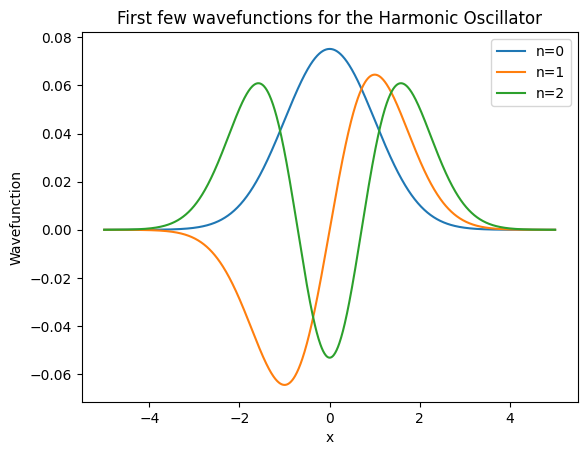

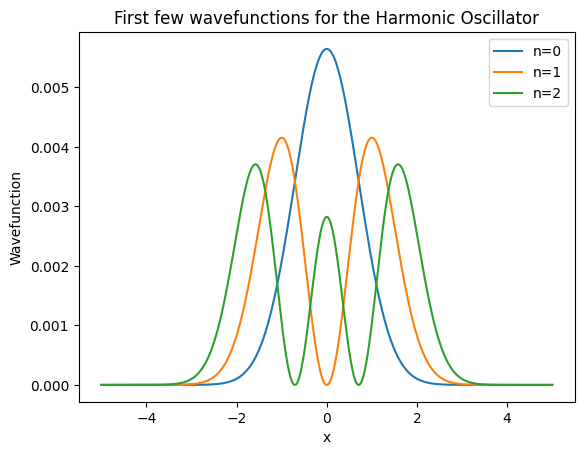

First few eigenvalues (energy levels):
E_0 = 0.4999968687936587
E_1 = 1.4999843468721399
E_2 = 2.499959369809745
E_3 = 3.499922839108553
E_4 = 4.499883281342379
E_5 = 5.499900585538967
E_6 = 6.500295856635215
E_7 = 7.502394864846722
E_8 = 8.510387063258012
E_9 = 9.534241231386238


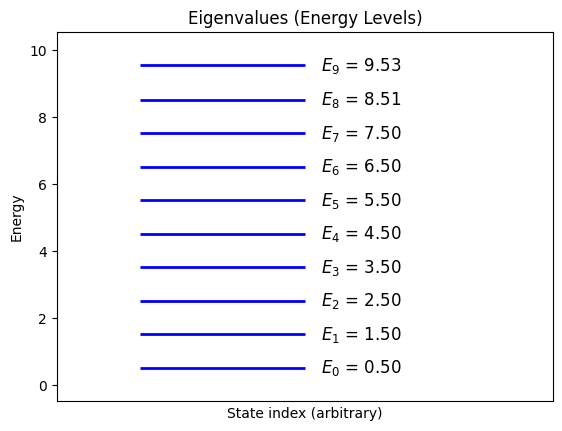

Reconstruction error (should be very small): 2.3394070918858946e-08


In [38]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Constants
hbar = 1.0  # Reduced Planck's constant
m = 1.0     # Mass of the particle
omega = 1.0 # Frequency of the harmonic oscillator

# Grid parameters
N = 1000    # Number of grid points
L = 10.0    # Extent of the spatial domain
x = np.linspace(-L/2, L/2, N)  # Position grid
dx = x[1] - x[0]           # Spatial step size


def create_hamiltonian(
        hbar,
        m,
        omega,
        N,
        L,
        x,
        dx
):
    V = 0.5 * m * omega**2 * x**2
    T = -(hbar**2 / (2 * m * dx**2)) * (np.diag(np.ones(N-1), -1) - 2 * np.diag(np.ones(N), 0) + np.diag(np.ones(N-1), 1))

    V_operator = np.diag(V)
    H = T + V_operator

    return H


def find_eigenvalues_and_vectors(
        H
):
    """
    This function calculates the eigenvalues and eigenstates of
    a hamiltonian. Note, in this code it will generate N eigenvalues 
    corresponding to the dimensions of the Hamiltonian matrix which 
    will be NxN for a system with N spatial bins
    """
    # Solve for eigenvalues and eigenvectors
    eigenvalues, eigenvectors = la.eigh(H)

    return eigenvalues, eigenvectors






def calculate_probability_distributions(
        eigenvectors
):
    probability_functions = np.abs(eigenvectors) ** 2
    
    return probability_functions




def plot_eigenfunctions(
        x,
        eigenvectors,
        plot_n_vectors
):
    for n in range(plot_n_vectors):
        plt.plot(x, eigenvectors[:, n], label=f"n={n}")
    plt.title("First few wavefunctions for the Harmonic Oscillator")
    plt.xlabel("x")
    plt.ylabel("Wavefunction")
    plt.legend()
    plt.show()





def plot_eigenvalues(eigenvalues, num_levels):
    """
    Plots the first `num_levels` eigenvalues with labels.
    
    Args:
    eigenvalues: list or np.ndarray
        A list or array of eigenvalues to be plotted.
    num_levels: int
        Number of energy levels (eigenvalues) to plot.
    
    Returns:
    None
    """
    # Ensure we don't plot more levels than available
    num_levels = min(num_levels, len(eigenvalues))
    
    fig, ax = plt.subplots()
    
    # Plot each eigenvalue as a horizontal line
    for n in range(num_levels):
        energy = eigenvalues[n]
        ax.hlines(y=energy, xmin=-0.5, xmax=0.5, color='blue', linewidth=2)
        ax.text(0.6, energy, f"$E_{n}$ = {energy:.2f}", fontsize=12, verticalalignment='center')
    
    # Formatting the plot
    ax.set_title("Eigenvalues (Energy Levels)")
    ax.set_xlabel("State index (arbitrary)")
    ax.set_ylabel("Energy")
    
    # Remove x-ticks since we are only interested in energy levels
    ax.set_xticks([])
    
    # Set limits to give some space for text
    ax.set_xlim([-1, 2])
    ax.set_ylim([min(eigenvalues[:num_levels]) - 1, max(eigenvalues[:num_levels]) + 1])
    
    plt.show()






H = create_hamiltonian(hbar, m, omega, N, L, x, dx)

eigenvalues, eigenvectors = find_eigenvalues_and_vectors(H)

# print(eigenvectors)
print(type(eigenvectors))
print(eigenvectors.shape)


show_n_eigenvalues = 10
plot_n_eigenvectors = 3

plot_eigenfunctions(x, eigenvectors, plot_n_eigenvectors)


probability_functions = calculate_probability_distributions(eigenvectors)

plot_eigenfunctions(x, probability_functions, plot_n_eigenvectors)


# Print the first few eigenvalues
print("First few eigenvalues (energy levels):")
for n in range(show_n_eigenvalues):
    print(f"E_{n} = {eigenvalues[n]}")


plot_eigenvalues(eigenvalues, show_n_eigenvalues)











# Spectral decomposition of the Hamiltonian
# Expressing H in terms of its eigenvalues and eigenvectors
H_spectral = np.zeros_like(H)
for n in range(len(eigenvalues)):
    H_spectral += eigenvalues[n] * np.outer(eigenvectors[:, n], eigenvectors[:, n])

# Verify the reconstruction by checking if H and H_spectral are close
print("Reconstruction error (should be very small):", np.linalg.norm(H - H_spectral))


## Expressing the Hamiltonian in creation and annihilation operators

The Hamiltonian given above is expressed in terms of the momentum operator. Now, both the momentum and position operators can be epxressed in a more fundamental way using the bosonic creation and annihilation operators in the following way
\begin{equation}
\begin{split}
    \hat{X} &= \sqrt{\frac{\hbar}{2m \omega}} ( \hat{a} + \hat{a}^{\dag}) \\
    \hat{P} &= i \sqrt{\frac{m \hbar \omega}{2}} ( \hat{a}^{\dag} - \hat{a}).
\end{split}
\end{equation}

We can think about these operators as raising and lowering operations on the ladder of energy eigenvalues of the system. Note these relations are the equivalent inverse to the following definitions of the raising and lowering operators
\begin{equation}
\begin{split}
    \hat{a} &= \frac{1}{\sqrt{2m \hbar \omega}} (m \omega \hat{X} + i \hat{P}) \\
    \hat{a}^{\dag} &= \frac{1}{\sqrt{2m \hbar \omega}} (m \omega \hat{X} - i \hat{P}).
\end{split}
\end{equation}
Note, in this formalism we can measure the excitation state o fth esystem by measuriung the number operator $\hat{n} = \hat{a}^{\dag} \hat{a}$, this will yield the eigenvalue $n$ which is the number of energy quanta in the system, hence giving the quantisatiojn integer $n$ defined above in $E_n$.

Using the above definitions we can express the Hamiltonian as follows
\begin{equation}
    \hat{H} = \hbar \omega \big( \hat{a}^{\dag} \hat{a} + \frac{1}{2} \big)
\end{equation}



### Why the BdG formalism is not applicable to this system

In general the BdG formalism is designed for systems with superconductivity or superfluidity, where pairing interactions bwtween fermionic particales (like electrons) are significant. This would apply to systems with multiple fermionic states, where particles can form pairs and you must consider both particel and hole excitations. These bullet points summarise the incompatibility of this single particle in a harmonic well system with the BdG model:

* **Single Particle Context:** The quantum harmonic oscillator problem, as you've described it, deals with a single particle in a harmonic potential. The physics of this system is well-described by the Schrödinger equation, leading to discrete energy levels and wavefunctions without the need for pair interactions.
* **No Pairing Interactions:** The BdG formalism incorporates pairing terms, which represent the attractive interactions between particles (e.g., Cooper pairs in superconductors). In a simple harmonic oscillator, these interactions are absent. Therefore, using BdG could introduce unnecessary complexity and misrepresent the physics.


### The difference between fermionic and bosonic operators

Bosons (integer spin particles) and fermions (half-integer spin particles) obey different statistical behavious. 
* Bosons obey Bose-Einstein statistics, they can occupy the same quantum state wihtout any restrictions. Their creation and annihilation operators obey the commutation relation $[\hat{a}, \hat{a}^{\dag}] = 1$. These are applicable to systems like photons in lasers and phonons in solids.
* Fermions obey Fermi-Dirac statistics, they follow the Pauli exclusion principle and thus cannot occupy the same quantum state. Their creation and annihilation operators obey the anticommutation relation $\{ \hat{c}, \hat{c}^{\dag} \} = 1$. These are applicable to systems like elctrons in metals.

### Treatment of a single electron in a harmonic potential

The system we are simulating is a single electron in a harmonic potential. This system can be treated wihtout explicit consideration of the fermionic nature of the electron. This is becasue it is a single particle system and moreover the eigenvectors which satisfy the Hamiltonian of this system are inherrently orthogonal and so implicitly satisfy the exclusion principle (since multiple of these orthogonal states cannot be siultaneously occupied). We must have a ocnsideration of the fermionic nature of electrons when considering many-body systems like in metals, superconductors and quantum dots.


In [39]:
# import numpy as np

# def bdg_hamiltonian(epsilon, delta):
#     """
#     Constructs the BdG Hamiltonian matrix for a simple two-mode system.
    
#     Parameters:
#     epsilon : float
#         Energy of the single-particle state.
#     delta : complex
#         Pairing potential.
        
#     Returns:
#     H : np.ndarray
#         The Hamiltonian matrix.
#     """
#     # Define the Hamiltonian matrix in matrix form
#     H = np.array([[0, delta, 0],
#                   [delta.conjugate(), epsilon, 0],
#                   [0, 0, -epsilon]], dtype=complex)
#     return H

# # Example parameters
# epsilon = 1.0  # Single-particle energy
# delta = 0.5    # Pairing potential

# # Construct the Hamiltonian
# H_bdg = bdg_hamiltonian(epsilon, delta)
# print("BdG Hamiltonian Matrix:")
# print(H_bdg)


# bdg_eigenvalues, bdg_eigenvectors = find_eigenvalues_and_vectors(H_bdg)

# # plot_eigenfunctions(x, bdg_eigenvectors, 3)
# print('BdG eigenvalues')
# print(bdg_eigenvalues)


# Local Density of States



In [40]:
# """
# Stand-alone
# """

# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.special import hermite, factorial
# from scipy.integrate import simps

# # Constants
# hbar = 1  # Reduced Planck's constant
# m = 1     # Mass of the particle
# omega = 1 # Angular frequency

# # Energy levels
# n_max = 1
# E_n = [(n + 0.5) * hbar * omega for n in range(n_max)]

# # Position grid
# x = np.linspace(-5, 5, 1000)

# # Calculate wavefunctions
# def psi(n, x):
#     coeff = (m * omega / (np.pi * hbar))**0.25 / (2**n * factorial(n))**0.5
#     return coeff * np.exp(-m * omega * x**2 / (2 * hbar)) * hermite(n)(np.sqrt(m * omega / hbar) * x)

# # Calculate LDOS
# LDOS = np.zeros_like(x)

# for n in range(n_max):
#     wavefunction = psi(n, x)
#     energy = E_n[n]
#     LDOS += wavefunction**2 * np.exp(-(x - energy)**2 / (0.1**2))  # Gaussian approximation for delta function

# # Normalize LDOS
# LDOS /= simps(LDOS, x)

# # Plot
# plt.plot(x, LDOS)
# plt.xlabel('Position (x)')
# plt.ylabel('Local Density of States (LDOS)')
# plt.title('Local Density of States for Quantum Harmonic Oscillator')
# plt.grid()
# plt.show()


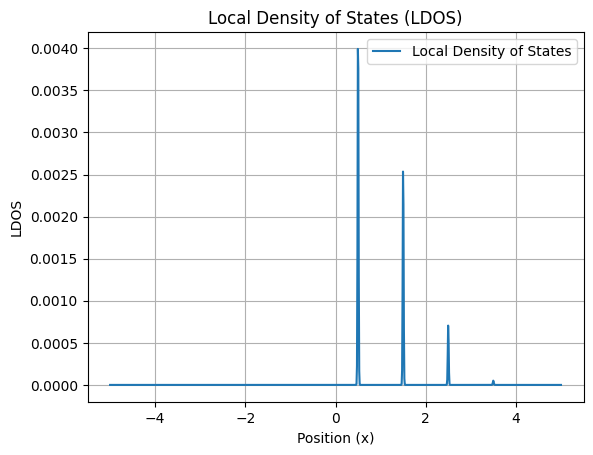

In [41]:
"""
Using first cell functions - eigenstates already calculated
"""



def calculate_ldos(eigenvalues, eigenvectors, x, dx):
    """
    Calculate the local density of states (LDOS).
    
    Args:
    eigenvalues: Eigenvalues of the Hamiltonian.
    eigenvectors: Eigenvectors of the Hamiltonian.
    x: Position grid.
    delta: Width of the Gaussian used to approximate the delta function.
    
    Returns:
    ldos: Local density of states as a function of position.
    """
    ldos = np.zeros_like(x)
    
    for n in range(len(eigenvalues)):
        wavefunction = eigenvectors[:, n]
        energy = eigenvalues[n]
        
        # Gaussian approximation of delta function
        ldos += np.abs(wavefunction)**2 * np.exp(-(x - energy)**2 / (2 * dx**2))
    
    return ldos


ldos = calculate_ldos(eigenvalues, eigenvectors, x, dx)

plt.plot(x, ldos, label='Local Density of States')
plt.title('Local Density of States (LDOS)')
plt.xlabel('Position (x)')
plt.ylabel('LDOS')
plt.legend()
plt.grid()
plt.show()